# Foreword & Remarks

- This work was adapted from the 1st place solution of the Jigsaw 2020 competition: https://www.kaggle.com/rafiko1/1st-place-jigsaw-post-processing-example
- First place post-processing details can be found at: https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification/discussion/160862. Main idea was to track the delta of predictions for each sample using successful submissions, then averaging them and 'pushing' the predictions in the same direction.
- I only configured it a little bit so that it can be used in this competition
- This notebook uses **only public notebook submission files**!! For me, using my ensemble as the "best sub" with minor tweaks to give a small boost in LB
- Since we are allowed to make 3 final submissions, if you are willing to risk it, feel free to have a submission that uses this pipeline

# Update Log

- **Version 6**: As per Chris' feedback, submisison dataframes are now sorted before their predictions are concatenated to the test dataframe. Also changed a public sub to another one as the submission could no longer be extracted. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Imports

In [50]:
# General imports
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [51]:
WEIGHT = 1 # best to keep between 1 and 2 from the orignal authors

In [52]:
submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
sub_best = pd.read_csv('sub_pp15.csv')#9632

In [53]:
files_sub = [
    'sub_9619.csv',#9619
    'sub_9603.csv',#9603
    'sub_9581.csv',#9581
    'sub_9577.csv',#9577
    '9557plusmeta.csv',#9559'
    'sub_mean_maybe9533.csv',#9533
    'ensembled_9527.csv',#9527
    'sub_minmax_9526.csv',#9526
    'sub_9512.csv',#9512
    'sub_maybe_0.9504.csv',#9504
    'sub_mixup7.csv',#9499
    'sub_9498.csv',#9498
    'sub_9486.csv',#9486
    'sub_768b5_5.csv',#9471
    'sub_512b6_3.csv',#9468
    'minmax3.csv',#9465
    'submission_median.csv',#9445
    'minmax7.csv',#9438
    'minmax2.csv',#9429
    'sub_b5new_2_.csv',#9426
    'mean_ensemble_b0-b5_256.csv',#9425
    'trashtry.csv',#9423
    'minmax5.csv',#9422
    'sub_512b4_2.csv',#9422
    'sub_384b5_2.csv',#9420
    'sub_blended_0.9418.csv',#9418
    'minmax1.csv',#9414
    'stack3.csv',#9369
    'stacknew1.csv',#9366
    'sub_b4new_1up_.csv',#9364
    'stack2.csv',#9364
    'sub_b2new_1_.csv',#9364
    'IMG_SZ_384_2018.csv',#9350
    'stack1.csv',#9349

    'sub_b3new_1upup_.csv',#9327
    'minmax_new1.csv',#9325
    'sub_b6new_1upup_.csv',#9315
    'trash_1.csv',#9294
    'minmax6.csv',#9282
    'sub_b1new_1up_.csv',#9280
    'sub_pp1.csv',#9275
    'sub_512b3_2.csv',#9267
    'sub_512b5_1.csv',#9256
    'sub_mmb5_1up.csv',#9252
    'sub_384b6_1.csv',#9251
    'IMG_SZ_256_2018.csv',#9250
    'sub_b2new_192upup_.csv',#9249
    'sub_mixup2.csv',#9245

    'sub_b4new_192upup_.csv',#9239
    'submission_g7_5more.csv',#9224
    'sub_b3new_192up_.csv',#9212
    'sub_b6new_192upup_.csv',#9191
    # 'submission_g8_retryagain.csv',#9189
    # 'submission_g6.csv',#9188
    'sub_mixup1.csv',#9173
    'sub_b5new_192up_.csv',#9170
    'sub_b0new_192upup_.csv',#9159
    'sub_b0new_1up_.csv',#9157
    'sub_b3new_128up_.csv',#9135
    'sub_b1new_128_.csv',#9133
    'submission_g5.csv',#9128####
    'submission_g3.csv',#9123####
    'sub_b1new_192upup_.csv',#9109
    'submission_g4.csv',#9084
    'sub_b4new_128up_.csv',#9081
    'sub_b5new_128_.csv',#9065
    'sub_b2new_128_.csv',#9061
    'sub_b0new_128up_.csv',#9003
    # '../input/submission-exploration/submission.csv',
    # '../input/rc-fork-siim-isic-melanoma-384x384/sub_EfficientNetB2_384.csv',
    # '../input/train-cv/submission.csv',
    # '../input/triple-stratified-kfold-with-tfrecords/submission.csv',
    # '../input/rank-then-blend/blend_sub.csv',
    'sub_pp15.csv'
]
files_sub = sorted(files_sub)
print(len(files_sub))
files_sub

69


['9557plusmeta.csv',
 'IMG_SZ_256_2018.csv',
 'IMG_SZ_384_2018.csv',
 'ensembled_9527.csv',
 'mean_ensemble_b0-b5_256.csv',
 'minmax1.csv',
 'minmax2.csv',
 'minmax3.csv',
 'minmax5.csv',
 'minmax6.csv',
 'minmax7.csv',
 'minmax_new1.csv',
 'stack1.csv',
 'stack2.csv',
 'stack3.csv',
 'stacknew1.csv',
 'sub_384b5_2.csv',
 'sub_384b6_1.csv',
 'sub_512b3_2.csv',
 'sub_512b4_2.csv',
 'sub_512b5_1.csv',
 'sub_512b6_3.csv',
 'sub_768b5_5.csv',
 'sub_9486.csv',
 'sub_9498.csv',
 'sub_9512.csv',
 'sub_9577.csv',
 'sub_9581.csv',
 'sub_9603.csv',
 'sub_9619.csv',
 'sub_b0new_128up_.csv',
 'sub_b0new_192upup_.csv',
 'sub_b0new_1up_.csv',
 'sub_b1new_128_.csv',
 'sub_b1new_192upup_.csv',
 'sub_b1new_1up_.csv',
 'sub_b2new_128_.csv',
 'sub_b2new_192upup_.csv',
 'sub_b2new_1_.csv',
 'sub_b3new_128up_.csv',
 'sub_b3new_192up_.csv',
 'sub_b3new_1upup_.csv',
 'sub_b4new_128up_.csv',
 'sub_b4new_192upup_.csv',
 'sub_b4new_1up_.csv',
 'sub_b5new_128_.csv',
 'sub_b5new_192up_.csv',
 'sub_b5new_2_.csv',


In [54]:
for file in files_sub:
    test[file.replace(".csv", "")] = pd.read_csv(file).sort_values('image_name')["target"]
test['id'] = test.index

In [55]:
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,9557plusmeta,IMG_SZ_256_2018,IMG_SZ_384_2018,ensembled_9527,mean_ensemble_b0-b5_256,minmax1,minmax2,minmax3,minmax5,minmax6,minmax7,minmax_new1,stack1,stack2,stack3,stacknew1,sub_384b5_2,sub_384b6_1,sub_512b3_2,sub_512b4_2,sub_512b5_1,sub_512b6_3,sub_768b5_5,sub_9486,sub_9498,sub_9512,sub_9577,sub_9581,sub_9603,sub_9619,sub_b0new_128up_,sub_b0new_192upup_,sub_b0new_1up_,sub_b1new_128_,sub_b1new_192upup_,sub_b1new_1up_,sub_b2new_128_,sub_b2new_192upup_,sub_b2new_1_,sub_b3new_128up_,sub_b3new_192up_,sub_b3new_1upup_,sub_b4new_128up_,sub_b4new_192upup_,sub_b4new_1up_,sub_b5new_128_,sub_b5new_192up_,sub_b5new_2_,sub_b6new_192upup_,sub_b6new_1upup_,sub_blended_0.9418,sub_maybe_0.9504,sub_mean_maybe9533,sub_minmax_9526,sub_mixup1,sub_mixup2,sub_mixup7,sub_mmb5_1up,sub_pp1,sub_pp15,submission_g3,submission_g4,submission_g5,submission_g6,submission_g7_5more,submission_g8_retryagain,submission_median,trash_1,trashtry,id
0,ISIC_0052060,IP_3579794,male,70.0,NaN,0.027383,0.025257,0.032299,0.027438,0.000309,0.000108,0.000108,0.000296,0.000425,0.001062,0.000166,0.027971,0.008034,0.008002,0.003161,0.008648,0.024640,0.028056,0.029265,0.028950,0.027468,0.028757,0.027959,0.465825,0.035619,0.000021,0.035168,0.031921,0.012047,0.022257,0.003847,0.000145,0.000135,0.003258,0.001343,0.000358,0.002780,0.001062,0.000597,0.000259,0.000294,0.000491,0.001496,0.000307,0.000108,0.000421,0.000133,0.000166,0.000129,0.000846,0.034647,0.000153,0.022257,0.026612,0.006530,0.001866,0.028119,0.000090,0.046493,0.036817,0.000606,0.000403,0.000168,0.000310,0.000311,0.000336,0.036479,0.033187,0.001561,0
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,0.024670,0.026853,0.028524,0.026074,0.000159,0.000020,0.000020,0.000020,0.000020,0.000045,0.000020,0.028525,0.007987,0.007918,0.003162,0.008760,0.020853,0.027013,0.027172,0.025464,0.023463,0.025109,0.025673,0.193438,0.030290,0.000013,0.026585,0.025793,0.009849,0.016384,0.003481,0.000147,0.000075,0.000884,0.000317,0.000141,0.003092,0.000220,0.000417,0.000236,0.000090,0.000231,0.001126,0.000168,0.000020,0.000449,0.000045,0.000068,0.000037,0.000427,0.029409,0.000118,0.016384,0.023487,0.002222,0.000893,0.023260,0.000009,0.039026,0.030272,0.000638,0.000871,0.000157,0.000474,0.000450,0.000387,0.023535,0.028081,0.000427,1
2,ISIC_0058510,IP_7960270,female,55.0,torso,0.024656,0.023367,0.027188,0.025925,0.000186,0.000072,0.000072,0.000072,0.000072,0.000098,0.000072,0.021296,0.007957,0.007847,0.003165,0.008500,0.027445,0.026734,0.026199,0.023276,0.025106,0.029317,0.021880,0.001455,0.020130,0.000281,0.028502,0.027990,0.012835,0.023354,0.003019,0.000167,0.000096,0.000927,0.000098,0.000205,0.002412,0.000200,0.000396,0.000362,0.000129,0.000161,0.001537,0.000253,0.000133,0.000491,0.000137,0.000124,0.000146,0.000575,0.023827,0.002049,0.023354,0.023767,0.002908,0.000957,0.023901,0.000017,0.041181,0.042521,0.000336,0.000385,0.000253,0.000401,0.000307,0.000490,0.031711,0.026570,0.000575,2
3,ISIC_0073313,IP_6375035,female,50.0,torso,0.023767,0.023928,0.027435,0.026442,0.000192,0.000053,0.000053,0.000053,0.000053,0.000101,0.000053,0.033638,0.007963,0.007866,0.003166,0.009011,0.022915,0.026576,0.026452,0.025389,0.024496,0.029134,0.023915,0.000135,0.021280,0.000015,0.030733,0.030547,0.010287,0.017497,0.003078,0.000219,0.000077,0.000718,0.000111,0.000165,0.002333,0.000222,0.000466,0.000285,0.000101,0.000196,0.001195,0.000328,0.000053,0.000522,0.000163,0.000195,0.000115,0.000598,0.024287,0.000135,0.017497,0.024287,0.002088,0.000693,0.022620,0.000022,0.044654,0.042328,0.000361,0.000556,0.000286,0.000477,0.000227,0.000459,0.026989,0.029217,0.000598,3
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,0.023220,0.025652,0.031915,0.033966,0.000948,0.000886,0.000527,0.001274,0.000527,0.000201,0.002020,0.019006,0.008137,0.008166,0.003206,0.008412,0.025112,0.029814,0.029969,0.027554,0.036377,0.030768,0.031367,0.572050,0.161430,0.000044,0.032410,0.027750,0.011848,0.018092,0.005805,0.

In [56]:
test.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', '9557plusmeta', 'IMG_SZ_256_2018',
       'IMG_SZ_384_2018', 'ensembled_9527', 'mean_ensemble_b0-b5_256',
       'minmax1', 'minmax2', 'minmax3', 'minmax5', 'minmax6', 'minmax7',
       'minmax_new1', 'stack1', 'stack2', 'stack3', 'stacknew1', 'sub_384b5_2',
       'sub_384b6_1', 'sub_512b3_2', 'sub_512b4_2', 'sub_512b5_1',
       'sub_512b6_3', 'sub_768b5_5', 'sub_9486', 'sub_9498', 'sub_9512',
       'sub_9577', 'sub_9581', 'sub_9603', 'sub_9619', 'sub_b0new_128up_',
       'sub_b0new_192upup_', 'sub_b0new_1up_', 'sub_b1new_128_',
       'sub_b1new_192upup_', 'sub_b1new_1up_', 'sub_b2new_128_',
       'sub_b2new_192upup_', 'sub_b2new_1_', 'sub_b3new_128up_',
       'sub_b3new_192up_', 'sub_b3new_1upup_', 'sub_b4new_128up_',
       'sub_b4new_192upup_', 'sub_b4new_1up_', 'sub_b5new_128_',
       'sub_b5new_192up_', 'sub_b5new_2_', 'sub_b6new_192upup_',
       'sub_b6new_1upup_', 'sub_blende

In [57]:
# # Derive the given sub increases or decreases in score
# test["diff_good1"] =  test['../input/rank-then-blend/blend_sub'] - test['../input/triple-stratified-kfold-with-tfrecords/submission']
# test["diff_good1"] =  test['../input/train-cv/submission'] - test['../input/siim-isic-melanoma-classification-ensemble/submission']
# test["diff_good2"] = test['../input/rc-fork-siim-isic-melanoma-384x384/sub_EfficientNetB2_384'] - test['../input/submission-exploration/submission']
# test["diff_good3"] = test['../input/analysis-of-melanoma-metadata-and-effnet-ensemble/ensembled'] - test['../input/new-basline-np-log2-ensemble-top-10/submission']

# test["diff_bad1"] = test['../input/stacking-ensemble-on-my-submissions/submission_mean'] - test['../input/minmax-ensemble-0-9526-lb/submission']

In [58]:
# Derive the given sub increases or decreases in score
test["diff_good0"] =  test['sub_9619'] - test['sub_9603'] 
test["diff_good1"] =  test['sub_9581'] - test['sub_9577'] 
test["diff_good2"] =  test['9557plusmeta'] - test['sub_mean_maybe9533'] 
test["diff_good3"] =  test['ensembled_9527'] - test['sub_minmax_9526']
test["diff_good4"] =  test['sub_9512'] - test['sub_maybe_0.9504']
test["diff_good5"] =  test['sub_mixup7'] - test['sub_9498']
test["diff_good6"] =  test['sub_9498'] - test['sub_9486']
test["diff_good7"] =  test['sub_768b5_5'] - test['sub_512b6_3']
test["diff_good8"] =  test['sub_512b6_3'] - test['minmax3']
test["diff_good9"] =  test['submission_median'] - test['minmax7']
test["diff_good10"] =  test['minmax2'] - test['sub_b5new_2_']
test["diff_good11"] =  test['mean_ensemble_b0-b5_256'] - test['trashtry']
test["diff_good12"] =  test['minmax5'] - test['sub_512b4_2']
test["diff_good13"] =  test['sub_384b5_2'] - test['sub_blended_0.9418']
test["diff_good14"] =  test['minmax1'] - test['stack3']
test["diff_good15"] =  test['stacknew1'] - test['sub_b4new_1up_']
test["diff_good16"] =  test['stack2'] - test['sub_b2new_1_']
test["diff_good17"] =  test['IMG_SZ_384_2018'] - test['stack1']

test["diff_good18"] =  test['sub_b3new_1upup_'] - test['minmax_new1']
test["diff_good19"] =  test['minmax_new1'] - test['sub_b6new_1upup_']
test["diff_good20"] =  test['sub_b6new_1upup_'] - test['trash_1']
test["diff_good21"] =  test['trash_1'] - test['minmax6']
test["diff_good22"] =  test['minmax6'] - test['sub_b1new_1up_']
test["diff_good23"] =  test['sub_b1new_1up_'] - test['sub_pp1']
test["diff_good24"] =  test['sub_pp1'] - test['sub_512b3_2']
test["diff_good25"] =  test['sub_512b3_2'] - test['sub_512b5_1']

test["diff_good26"] =  test['sub_512b5_1'] - test['sub_mmb5_1up']
test["diff_good27"] =  test['sub_384b6_1'] - test['IMG_SZ_256_2018']
test["diff_good28"] =  test['sub_b2new_192upup_'] - test['sub_mixup2']

test["diff_good29"] =  test['sub_b4new_192upup_'] - test['submission_g7_5more']
test["diff_good30"] =  test['sub_b3new_192up_'] - test['sub_b6new_192upup_']
#test["diff_good31"] =  test['submission_g8_retryagain'] - test['submission_g6.csv']
test["diff_good32"] =  test['sub_mixup1'] - test['sub_b5new_192up_']
test["diff_good33"] =  test['sub_b0new_192upup_'] - test['sub_b0new_1up_']
test["diff_good34"] =  test['sub_b3new_128up_'] - test['sub_b1new_128_']
test["diff_good35"] =  test['submission_g5'] - test['submission_g3']
test["diff_good36"] =  test['sub_b1new_192upup_'] - test['submission_g4']
test["diff_good37"] =  test['sub_b4new_128up_'] - test['sub_b5new_128_']
test["diff_good38"] =  test['sub_b2new_128_'] - test['sub_b0new_128up_']

In [59]:
test["sub_best"] = test['sub_pp15']
col_comment = ["id", "image_name", "patient_id", "sub_best"]
col_diff = [column for column in test.columns if "diff" in column]
test_diff = test[col_comment + col_diff].reset_index(drop=True)

test_diff["diff_avg"] = test_diff[col_diff].mean(axis=1) # the mean trend

In [60]:
# Apply the post-processing technique in one line (as explained in the pseudo-code of my post.
test_diff["sub_new"] = test_diff.apply(lambda x: (1+WEIGHT*x["diff_avg"])*x["sub_best"] if x["diff_avg"]<0 else (1-WEIGHT*x["diff_avg"])*x["sub_best"] + WEIGHT*x["diff_avg"] , axis=1)

In [61]:
submission["target"] = sub_best["target"]
submission.head()

,image_name,target
0,ISIC_0052060,0.036817
1,ISIC_0052349,0.030272
2,ISIC_0058510,0.042521
3,ISIC_0073313,0.042328
4,ISIC_0073502,0.028967


In [62]:
test_diff.head()

,id,image_name,patient_id,sub_best,diff_good0,diff_good1,diff_good2,diff_good3,diff_good4,diff_good5,diff_good6,diff_good7,diff_good8,diff_good9,diff_good10,diff_good11,diff_good12,diff_good13,diff_good14,diff_good15,diff_good16,diff_good17,diff_good18,diff_good19,diff_good20,diff_good21,diff_good22,diff_good23,diff_good24,diff_good25,diff_good26,diff_good27,diff_good28,diff_good29,diff_good30,diff_good32,diff_good33,diff_good34,diff_good35,diff_good36,diff_good37,diff_good38,diff_avg,sub_new
0,0,ISIC_0052060,IP_3579794,0.036817,0.010210,-0.003247,0.005126,0.000826,-0.000132,-0.007500,-0.430206,-0.000798,0.028462,0.036313,-0.000059,-0.001251,-0.028525,-0.010007,-0.003053,0.008540,0.007405,0.024264,-0.027480,0.027125,-0.032341,0.032125,0.000704,-0.046134,0.017228,0.001797,0.027377,0.002799,-0.000803,-0.000003,0.000165,0.006396,0.000010,-0.002998,-0.000438,0.000941,0.001076,-0.001067,-0.009399,0.036471
1,1,ISIC_0052349,IP_7782715,0.030272,0.006535,-0.000791,0.008286,0.002588,-0.000105,-0.007031,-0.163148,0.000563,0.025089,0.023515,-0.000048,-0.000268,-0.025444,-0.008556,-0.003141,0.008740,0.007501,0.020536,-0.028294,0.028098,-0.027654,0.028036,-0.000095,-0.038885,0.011854,0.003710,0.023453,0.000160,-0.000673,-0.000281,0.000053,0.002177,0.000072,-0.000648,-0.000481,-0.000554,0.000676,-0.000389,-0.002759,0.030188
2,2,ISIC_0058510,IP_7960270,0.042521,0.010519,-0.000513,0.001302,0.002158,-0.001768,0.003771,0.018675,-0.007437,0.029246,0.031639,-0.000053,-0.000389,-0.023205,0.003618,-0.003093,0.008367,0.007451,0.019231,-0.021135,0.020721,-0.025995,0.026472,-0.000107,-0.040976,0.014982,0.001093,0.025089,0.003367,-0.000758,-0.000054,-0.000017,0.002771,0.000071,-0.000565,-0.000083,-0.000286,0.001046,-0.000607,0.002751,0.045155
3,3,ISIC_0073313,IP_6375035,0.042328,0.007210,-0.000186,0.006270,0.002155,-0.000120,0.001340,0.021145,-0.005219,0.029081,0.026936,-0.000143,-0.000406,-0.025336,-0.001372,-0.003114,0.008958,0.007400,0.019472,-0.033442,0.033041,-0.028620,0.029116,-0.000064,-0.044489,0.018202,0.001956,0.024474,0.002648,-0.000470,0.000100,-0.000013,0.001925,0.000142,-0.000433,-0.000074,-0.000445,0.000673,-0.000745,0.002567,0.044787
4,4,ISIC_0073502,IP_0589375,0.028967,0.006244,-0.004660,0.005128,0.006143,-0.000404,-0.132336,-0.410620,0.000599,0.029494,0.022689,-0.001493,-0.001317,-0.027027,-0.006508,-0.002319,0.008197,0.005973,0.023777,-0.018641,0.018161,-0.028520,0.029164,-0.000209,-0.041856,0.012298,-0.006408,0.036297,0.004162,-0.000637,-0.000161,0.000159,0.001981,-0.000125,-0.002768,-0.001400,0.001718,0.001783,-0.001398,-0.012496,0.028605


In [63]:
submission.loc[test["id"], "target"] = test_diff["sub_new"].values

In [64]:
submission.to_csv("sub_pp25.csv", index=False)
submission.head()

,image_name,target
0,ISIC_0052060,0.036471
1,ISIC_0052349,0.030188
2,ISIC_0058510,0.045155
3,ISIC_0073313,0.044787
4,ISIC_0073502,0.028605


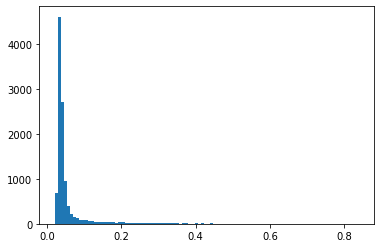

In [65]:
plt.hist(submission.target,bins=100)
plt.show()

# MinMax Kaggle

In [118]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd 
import os 

def MinMaxBestBaseStacking(input_folder, best_base, output_path):
    sub_base = pd.read_csv(best_base)
    all_files = os.listdir(input_folder)

    # Read and concatenate submissions
    outs = [pd.read_csv(os.path.join(input_folder, f), index_col=0) for f in all_files]
    concat_sub = pd.concat(outs, axis=1)
    cols = list(map(lambda x: "target" + str(x), range(len(concat_sub.columns))))
    concat_sub.columns = cols
    concat_sub.reset_index(inplace=True)

    # get the data fields ready for stacking
    concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:6].max(axis=1)
    concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:6].min(axis=1)
    concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:6].mean(axis=1)
    concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:6].median(axis=1)

    # set up cutoff threshold for lower and upper bounds
    cutoff_lo = 0.66
    cutoff_hi = 0.33
    
#     cutoff_lo = 0.85
#     cutoff_hi = 0.17

    concat_sub['is_iceberg_base'] = sub_base['target']
    concat_sub['target'] = np.where(np.all(concat_sub.iloc[:, 1:6] > cutoff_lo, axis=1),
                                        concat_sub['is_iceberg_max'],
                                        np.where(np.all(concat_sub.iloc[:, 1:6] < cutoff_hi, axis=1),
                                                 concat_sub['is_iceberg_min'],
                                                 concat_sub['is_iceberg_base']))
    concat_sub[['image_name', 'target']].to_csv(output_path,
                                            index=False, float_format='%.12f')

In [119]:
MinMaxBestBaseStacking('/content/drive/My Drive/pp9664files', 'sub_pp15.csv', 'minmax_new2.csv')